In [1]:
import os
import numpy as np
import pandas as pd
from Bio.pairwise2 import format_alignment
from Bio.Align import substitution_matrices
from Bio import pairwise2
from Bio import SeqIO, SearchIO
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio.Blast import NCBIWWW
from Bio.Blast import NCBIXML

from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
from Bio.Phylo.TreeConstruction import DistanceCalculator
from Bio.Phylo.PhyloXML import Phylogeny
from Bio import Phylo

from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
blast_id = True

/usr/local/lib/python3.10/dist-packages/Bio/pairwise2.py:278: BiopythonDeprecationWarning: Bio.pairwise2 has been deprecated, and we intend to remove it in a future release of Biopython. As an alternative, please consider using Bio.Align.PairwiseAligner as a replacement, and contact the Biopython developers if you still need the Bio.pairwise2 module.
  warnings.warn(


In [2]:
!pip install biopython
!pip install jupiter_bokeh

In [3]:
n = 'ATGACGGATCAGCCGCAAGCGGAATTGGCGTTTACGTACGATGCGCCGTAA'  # nucleotide sequence
aa = 'MMMELQHQRLMALAGQLQLESLISAAPALSQQAVDQEWSYMDFLEHLLHE' # protein sequence

seq_n = Seq(n)
seq_aa = Seq(aa)

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>SIMPLE SEQUENCE OPERATIONS</span></b></p></div>

- Since we don't have <code>.alphabet</code> details, you'll have to know the <b>sequence type</b> you are using, so it makes sense to give them names accordingly.
- An example operation you could apply on a <b>nucleotide sequence</b> would be the **<span style='color:#F55AA2'>reverse_complement</span>**, which is an operation applied to a <b><span style='color:#F55AA2'>DNA</span></b> based sequence.

In [4]:
print(seq_n.reverse_complement()) # possible
print(seq_aa.reverse_complement()) # not actually possible

TTACGGCGCATCGTACGTAAACGCCAATTCCGCTTGCGGCTGATCCGTCAT
EDLLDELFHKRSWEQHBTQQSLTPTTSILSELQLQCTLTKLYQDQLEKKK


### <b><span style='color:#E888BB'> 2.2 |</span> Sequence Annotation Objects </b>

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>DEFINIG MORE DETAIL</span></b></p></div>

- Sequence files obtained from databases provied the option to for more <b>detailed information</b> storage about the sequence, not just the <b>sequence</b> alone.
- In BioPython, we can use <code>SeqRecord</code> objects with our defined <code>Seq</code> object instances & add define additional information about our sequence(s).
- Two commonly added detailed information about a sequence:
  > - <b><span style='color:#F55AA2'>Annotations</span></b> ( Extra metadata information about the sequence )
  > - <b><span style='color:#F55AA2'>Features</span></b> ( Extra information about the sequence content, which is extractable )

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>SEQ RECORD CLASS</span></b></p></div>

<b>SeqRecord</b> | [BioPython](https://biopython.org/wiki/SeqRecord)

> SeqRecord objects are used in Biopython to hold a sequence (as a Seq object) with identifiers (ID and name), description and optionally annotation and sub-features.

- <code>SeqRecord</code> is class we'd use when we want to work with <code>Seq</code> that have more information about the sequence, grouped all in one spot.
- If we wanted to do <b>multiple sequence alignment</b>, we have to define each individual sequences in the <code>SeqRecord</code> object, which requires just the <b>id</b> to be defined.

<code>SeqRecord</code> objects can store:
> - <code>seq</code> - The sequence itself ( <code>Seq()</code> objects )
> - <code>id</code> - Sequence identifier
> - <code>name</code> - Sequence name
> - <code>description</code> - Description of the sequence
> - <code>annotations</code> - Global annotations for the whole sequence (<b>dic</b>)
> - <code>features</code> - Structured features (<b>lst</b> of <code>SeqFeature</code> objects)
> - <code>letter_annotations</code> - Annotations for each letter (position) in the sequence
> - <code>dexrefs</code> - References to databases

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>SEQ RECORD ANNOTATIONS & SAVING FILES</span></b></p></div>

- As we saw, <code>SeqRecord</code> can hold information about different <b><span style='color:#F55AA2'>annotations</span></b> for the sequence in question.
- Let's define some basic annotations for <code>SeqRec</code> below, which we <b>can subsequently save</b> using <code>SeqIO</code> using the <b><span style='color:#F55AA2'>minimalistic</span></b> <b>FASTA</b> or <b><span style='color:#F55AA2'>detailed</span></b> <b>Genbank</b> formats.
- We'll look at which <code>annotations</code> data are typically added in <b>Section 3</b>, where we'll load and look at <b>real sequence</b> files.

In [5]:
seq_record = SeqRecord(seq_n)

seq_record.id = "ABC12345"
seq_record.description = 'Neucleotide sequence'
seq_record.annotations['molecule_type'] = 'DNA'
SeqIO.write(seq_record,"my_seq.fasta","fasta")
SeqIO.write(seq_record,"my_seq.gb","genbank")

1

In [6]:
# As we can see FASTA doesn't seem to save the annotations data
print('FASTA Annotations:')
read_seq1 = SeqIO.read('my_seq.fasta','fasta')
print(read_seq1.annotations)  # annotations

# Whereas Genbank does
print('GenBank Annotations')
read_seq2 = SeqIO.read('my_seq.gb','genbank')
print(read_seq2.annotations)  # annotations

FASTA Annotations:
{}
GenBank Annotations
{'molecule_type': 'DNA', 'data_file_division': 'UNK', 'date': '01-JAN-1980', 'accessions': ['ABC12345'], 'keywords': [''], 'source': '', 'organism': '.', 'taxonomy': []}


<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>SEQRECORD FEATURES</span></b></p></div>

- <b>Real sequences</b> can be very long & contain useful <b>subset sequences</b> that one might be interested in.
- <b><span style='color:#F55AA2'>Feature descriptions</span></b> can be quite useful; if we want to define subsets of the <b>sequence</b> to which a <b>feature</b> is applicable.
- More detailed information about the <code>SeqFeature</code> class | [BioPython Documentation](https://biopython.org/docs/1.75/api/Bio.SeqFeature.html)

<b>Some</b> <code>SeqFeature</code> object attributes:
> - <code>location</code> - Indicator of which region the annotation applies ( <code>FeatureLocation</code> object )
> - <code>type</code> - Feature type ( <code>string</code> )
> - <code>qualifiers</code> - Additional Info ( <code>dict</code> )



In [7]:
from Bio import SeqFeature

# Define locations
s0 = SeqFeature.AfterPosition(10) # exact location
s1 = SeqFeature.BetweenPosition(40,left=35,right=40) # fuzzy location (range)
location = SeqFeature.FeatureLocation(s0,s1) # define the feature location
print(f'Feature Location Notation: {location}')

Feature Location Notation: [>10:(35^40)]


In [8]:
# Example for a gene feature

unitig = Seq('GTGCGACAGCAAAGTCCAAACCAGCGTCCCCGCC')
feature = SeqFeature.SeqFeature(SeqFeature.FeatureLocation(5,10), # location (shorter)
                                type='gene' # the specified type of the feature
                               )

# If we wanted to extract the feature
feature_seq = feature.extract(unitig)
print(feature_seq)

ACAGC


We can of course add this feature to the <code>SeqRecord</code> class & save, subsequently recalling the feature again.

In [9]:
seq_record = SeqRecord(unitig)

seq_record.id = "ABC12345"
seq_record.description = 'Neisseria gonorrhoeae unitig'
seq_record.annotations['molecule_type'] = 'DNA'
seq_record.features = [feature]

In [10]:
# We can of course write to gb file & see our stored data
SeqIO.write(seq_record,"my_seq.gb","genbank")
read_seq2 = SeqIO.read('my_seq.gb','genbank')
print(read_seq2.features)  # annotations

# define one of the features from the list
feature = read_seq2.features[0]

# Extracted feature
feature_seq = feature.extract(read_seq2)
print('\nExtracted Feature:')
print(feature_seq)

[SeqFeature(SimpleLocation(ExactPosition(5), ExactPosition(10), strand=1), type='gene')]

Extracted Feature:
ID: ABC12345
Name: ABC12345
Description: Neisseria gonorrhoeae unitig
Number of features: 1
/molecule_type=DNA
Seq('ACAGC')


In [11]:
''' FASTA formats w/ one sequence '''

single_fasta = 'genbank/example.fasta' # nuceotide seq
fasta_n = SeqIO.read(single_fasta,'fasta')
print(f'FASTA Content:')
print(fasta_n)      # Print fasta file information

print(f'\nNumber of Nucleotides: {len(fasta_n)}') # number of nucleotides
seq_fasta = fasta_n.seq # Extract Sequence

print('\nFeatures & Annotations:')
print(fasta_n.features)     # some files contain just the basic details
print(fasta_n.annotations)

FASTA Content:
ID: HSBGPG
Name: HSBGPG
Description: HSBGPG Human gene for bone gla protein (BGP)
Number of features: 0
Seq('GGCAGATTCCCCCTAGACCCGCCCGCACCATGGTCAGGCATGCCCCTCCTCATC...AAG')

Number of Nucleotides: 1231

Features & Annotations:
[]
{}


In [12]:
''' FASTA formats w/ multile sequences '''

multi_fasta = 'genbank/NC_005816.faa' # protein seq
iter_multi_fasta_aa = SeqIO.parse(multi_fasta,'fasta') # returns an interator

lst_fasta_aa = []
for seq_aa in iter_multi_fasta_aa:
    lst_fasta_aa.append(seq_aa)

print(f'Number of Sequences read: {len(lst_fasta_aa)}')
print(f'\nFirst Sequence: \n{lst_fasta_aa[0]}')

Number of Sequences read: 10

First Sequence: 
ID: gi|45478712|ref|NP_995567.1|
Name: gi|45478712|ref|NP_995567.1|
Description: gi|45478712|ref|NP_995567.1| putative transposase [Yersinia pestis biovar Microtus str. 91001]
Number of features: 0
Seq('MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVA...GVA')


### <b><span style='color:#E888BB'> 3.3 |</span> GENBANK format </b>
Snipplet from [Bacterial Genoes Bioinformatics](https://www.futurelearn.com/info/courses/bacterial-genomes-bioinformatics/0/steps/47012)

> The Genbank format allows for the storage of information in addition to a DNA/protein sequence. It <b>holds much more information</b> than the FASTA format. Formats similar to Genbank have been developed by ENA (EMBL format) and by DDBJ (DDBJ format).

**COMPATIBILITY WITH DATABASES**

> Primary databases have developed highly structured data file formats that enable the storage of all of these additional data that accompany the otherwise “naked” DNA sequence encoded in a FASTA file. The strict layout is necessary for the file to be compatible with a range of computer programs. Each of the three primary databases have their own sequence file format layout. However, all of them contain almost the same fields and the same information, making them interchangeable.

- Like <b><span style='color:#F55AA2'>FASTA</span></b>, <b><span style='color:#F55AA2'>GenBank</span></b> files can store more than one sequence & are read in exactly the same way as shown above using class <code>SeqIO</code>. (<code>.read</code> & <code>.parse</code>)
- However as indicated above, they tend to contain much more in depth information about the sequence, content of the nature storable in the <code>SeqRecord</code> class object.
- As we can see below, they can store both <b><span style='color:#F55AA2'>Annotations</span></b> & <b><span style='color:#F55AA2'>Features</span></b> ( both of which we looked at in <b>Section 2.2</b> ), which makes this format very useful.

In [13]:
file_gb = 'genbank/example.gb'

''' Read GenBank format '''
# GenBank format are more comprehnsive than fasta.

gb = SeqIO.read(file_gb,'genbank')
seq_gb = gb.seq # store sequence

print('Print Seq (preview)')
print(gb.seq[:40])

print('\nLength of Sequence:')
print(len(gb.seq))

print('\nRecord ID:')
print(gb.id)

print('\nName:')
print(gb.name)

print('\nDescription:')
print(gb.description)

# Annotations
print('\nNumber of Annotations:')
print(len(gb.annotations))

# Features
print('\nNumber of Features:')
print(len(gb.features))

Print Seq (preview)
TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTG

Length of Sequence:
9609

Record ID:
NC_005816.1

Name:
NC_005816

Description:
Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence

Number of Annotations:
13

Number of Features:
41


<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>ANNOTATION CONTENT</span></b></p></div>

- We can visualise the <b><span style='color:#F55AA2'>annotation</span></b> content (if it is present) using <code>.annotations</code>.
- Being a <b>dictionary</b>, we can get see what sort annotations are present by calling <code>.annotations.keys()</code>.

In [14]:
# annotations field; dic that provides a number of properties for the seq
print('Annotations dictionary:\n')
print(gb.annotations)

print('\nKeys:')
print(gb.annotations.keys())

Annotations dictionary:

{'molecule_type': 'DNA', 'topology': 'circular', 'data_file_division': 'BCT', 'date': '21-JUL-2008', 'accessions': ['NC_005816'], 'sequence_version': 1, 'gi': '45478711', 'keywords': [''], 'source': 'Yersinia pestis biovar Microtus str. 91001', 'organism': 'Yersinia pestis biovar Microtus str. 91001', 'taxonomy': ['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacteriales', 'Enterobacteriaceae', 'Yersinia'], 'references': [Reference(title='Genetics of metabolic variations between Yersinia pestis biovars and the proposal of a new biovar, microtus', ...), Reference(title='Complete genome sequence of Yersinia pestis strain 91001, an isolate avirulent to humans', ...), Reference(title='Direct Submission', ...), Reference(title='Direct Submission', ...)], 'comment': 'PROVISIONAL REFSEQ: This record has not yet been subject to final\nNCBI review. The reference sequence was derived from AE017046.\nCOMPLETENESS: full length.'}

Keys:
dict_keys(['molecule_t

In [15]:
# Getting specific key values
print('\nGet specific parts of the annotation:\n')
print('Taxonomy:\n')
print(gb.annotations['taxonomy'])

print('Source:\n')
print(gb.annotations['source'])

print('Date:\n')
print(gb.annotations['date'])

print('gi number:\n')
print(gb.annotations['gi'])


Get specific parts of the annotation:

Taxonomy:

['Bacteria', 'Proteobacteria', 'Gammaproteobacteria', 'Enterobacteriales', 'Enterobacteriaceae', 'Yersinia']
Source:

Yersinia pestis biovar Microtus str. 91001
Date:

21-JUL-2008
gi number:

45478711


<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>SHOWING FEATURE CONTENT</span></b></p></div>

- If there are any <b><span style='color:#F55AA2'>features</span></b> present in the file, we can get the <b>list</b> by calling <code>.features</code> ( What we defined in <b>Section 2.2</b> as well )
- <b>Subsets</b> of the <b>sequence</b> can be extracted <code>.extract()</code> from the The <b>list</b> of <code>SeqFeature</code> objects.

In [16]:
gb.features[:5] # show only a few features (total=41)

[SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(9609), strand=1), type='source', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(0), ExactPosition(1954), strand=1), type='repeat_region'),
 SeqFeature(SimpleLocation(ExactPosition(86), ExactPosition(1109), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(86), ExactPosition(1109), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(86), ExactPosition(959), strand=1), type='misc_feature', qualifiers=...)]

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>EXPLORING THE GENE FEATURE TYPE</span></b></p></div>


- One of the features <code>.type</code> that is used in <code>.features</code> is <b><span style='color:#F55AA2'>"gene"</span></b>.
- We can for example, cycling through all features & get all the annotated <b>genes</b> in the whole sequence.
- Exploring these genes, we can get their <b><span style='color:#F55AA2'>locus tag</span></b> (from <b>qualifiers</b>), <b><span style='color:#F55AA2'>database reference</span></b> (from <b>qualifiers</b>),  <b><span style='color:#F55AA2'>strand</span></b> & <b><span style='color:#F55AA2'>location</span></b>.
- We can apply an operation called <b>translate</b> (<b>Section 4.3</b>) to try to <b>find the proteins</b> that the gene feature encode

In [17]:
gene_features = []
for i in range(len(gb.features)):
    if(gb.features[i].type == 'gene'):
        gene_features.append(gb.features[i])

print(f'Number of gene features: {len(gene_features)}')
gene_features

Number of gene features: 10


[SeqFeature(SimpleLocation(ExactPosition(86), ExactPosition(1109), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(1105), ExactPosition(1888), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(2924), ExactPosition(3119), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(3485), ExactPosition(3857), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(4342), ExactPosition(4780), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(4814), ExactPosition(5888), strand=-1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(6004), ExactPosition(6421), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(6663), ExactPosition(7602), strand=1), type='gene', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(7788), ExactPosition(8088), strand=-1), type='gene', qualifiers=...),
 SeqFeatur

In [18]:
# Gene Qualifiers
gene_features[0].qualifiers

{'locus_tag': ['YP_pPCP01'], 'db_xref': ['GeneID:2767718']}

In [19]:
for feat in gene_features:
    print(f"locus tag: {feat.qualifiers['locus_tag']}, database ref: {feat.qualifiers['db_xref']}, strand: {feat.strand}, location: {feat.location}")

locus tag: ['YP_pPCP01'], database ref: ['GeneID:2767718'], strand: 1, location: [86:1109](+)
locus tag: ['YP_pPCP02'], database ref: ['GeneID:2767716'], strand: 1, location: [1105:1888](+)
locus tag: ['YP_pPCP03'], database ref: ['GeneID:2767717'], strand: 1, location: [2924:3119](+)
locus tag: ['YP_pPCP04'], database ref: ['GeneID:2767720'], strand: 1, location: [3485:3857](+)
locus tag: ['YP_pPCP05'], database ref: ['GeneID:2767712'], strand: 1, location: [4342:4780](+)
locus tag: ['YP_pPCP06'], database ref: ['GeneID:2767721'], strand: -1, location: [4814:5888](-)
locus tag: ['YP_pPCP07'], database ref: ['GeneID:2767719'], strand: 1, location: [6004:6421](+)
locus tag: ['YP_pPCP08'], database ref: ['GeneID:2767715'], strand: 1, location: [6663:7602](+)
locus tag: ['YP_pPCP09'], database ref: ['GeneID:2767713'], strand: -1, location: [7788:8088](-)
locus tag: ['YP_pPCP10'], database ref: ['GeneID:2767714'], strand: -1, location: [8087:8360](-)


/usr/local/lib/python3.10/dist-packages/Bio/SeqFeature.py:231: BiopythonDeprecationWarning: Please use .location.strand rather than .strand
  warnings.warn(


In [20]:
protein_feat = []
for feat in gene_features:
    protein_feat.append(feat.extract(gb.seq).translate(table='Bacterial',cds=True))

protein_feat # list of protein sequences

[Seq('MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVA...GVA'),
 Seq('MMMELQHQRLMALAGQLQLESLISAAPALSQQAVDQEWSYMDFLEHLLHEEKLA...NPE'),
 Seq('MNKQQQTALNMARFIRSQSLILLEKLDALDADEQAAMCERLHELAEELQNSIQA...TGT'),
 Seq('MSKKRRPQKRPRRRRFFHRLRPPDEHHKNRRSSQRWRNPTGLKDTRRFPPEAPS...PTR'),
 Seq('MGGGMISKLFCLALIFLSSSGLAEKNTYTAKDILQNLELNTFGNSLSHGIYGKQ...YYH'),
 Seq('MSDTMVVNGSGGVPAFLFSGSTLSSYRPNFEANSITIALPHYVDLPGRSNFKLM...LLK'),
 Seq('MKFHFCDLNHSYKNQEGKIRSRKTAPGNIRKKQKGDNVSKTKSGRHRLSKTDKR...DLP'),
 Seq('MKKSSIVATIITILSGSANAASSQLIPNISPDSFTVAASTGMLSGKSHEMLYDA...YRF'),
 Seq('MRTLDEVIASRSPESQTRIKEMADEMILEVGLQMMREELQLSQKQVAEAMGISQ...FHV'),
 Seq('MADLKKLQVYGPELPRPYADTVKGSRYKNMKELRVQFSGRPIRAFYAFDPIRRA...ESK')]

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>EXPLORING CDS FEATURE TYPE</span></b></p></div>


- Another <code>.type</code> that is used in <code>.features</code> is <b><span style='color:#F55AA2'>"CDS"</span></b> (<b>Coding Sequence</b>)
- <b>CDS</b> <code>qualifiers</code> contain quite a bit more content, including the <b>translation</b> sequence, so we can compare our translation of the <b>gene</b> feature, since both types are reffering to the same parts of the sequence.

In [21]:
CDS_features = []
for i in range(len(gb.features)):
    if(gb.features[i].type == 'CDS'):
        CDS_features.append(gb.features[i])

print(f"Number of CDS features: {len(CDS_features)}")
CDS_features

Number of CDS features: 10


[SeqFeature(SimpleLocation(ExactPosition(86), ExactPosition(1109), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(1105), ExactPosition(1888), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(2924), ExactPosition(3119), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(3485), ExactPosition(3857), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(4342), ExactPosition(4780), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(4814), ExactPosition(5888), strand=-1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(6004), ExactPosition(6421), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(6663), ExactPosition(7602), strand=1), type='CDS', qualifiers=...),
 SeqFeature(SimpleLocation(ExactPosition(7788), ExactPosition(8088), strand=-1), type='CDS', qualifiers=...),
 SeqFeature(SimpleL

In [22]:
print(f'CDS Qualifier Keys: {CDS_features[0].qualifiers.keys()}\n')

print('Showing First CDS Feature')
pprint(CDS_features[0].qualifiers) # ordered dictionary

CDS Qualifier Keys: dict_keys(['locus_tag', 'note', 'codon_start', 'transl_table', 'product', 'protein_id', 'db_xref', 'translation'])

Showing First CDS Feature
{'codon_start': ['1'],
 'db_xref': ['GI:45478712', 'GeneID:2767718'],
 'locus_tag': ['YP_pPCP01'],
 'note': ['similar to corresponding CDS from previously sequenced pPCP plasmid '
          'of Yersinia pestis KIM (AF053945) and CO92 (AL109969), also many '
          'transposase entries for insertion sequence IS100 of Yersinia '
          'pestis. Contains IS21-like element transposase, HTH domain '
          '(Interpro|IPR007101)'],
 'product': ['putative transposase'],
 'protein_id': ['NP_995567.1'],
 'transl_table': ['11'],
 'translation': ['MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVASLLDEYRDYIRQRIADAHPYKIPATVIAREIRDQGYRGGMTILRAFIRSLSVPQEQEPAVRFETEPGRQMQVDWGTMRNGRSPLHVFVAVLGYSRMLYIEFTDNMRYDTLETCHRNAFRFFGGVPREVLYDNMKTVVLQRDAYQTGQHRFHPSLWQFGKEMGFSPRLCRPFRAQTKGKVERMVQYTRNSFYIPLMTRLRPMGITVDVETANRHGLRWLHDVANQRKHETIQA

In [23]:
for key, value in CDS_features[0].qualifiers.items():
    print(f'{key} : {value}')

locus_tag : ['YP_pPCP01']
note : ['similar to corresponding CDS from previously sequenced pPCP plasmid of Yersinia pestis KIM (AF053945) and CO92 (AL109969), also many transposase entries for insertion sequence IS100 of Yersinia pestis. Contains IS21-like element transposase, HTH domain (Interpro|IPR007101)']
codon_start : ['1']
transl_table : ['11']
product : ['putative transposase']
protein_id : ['NP_995567.1']
db_xref : ['GI:45478712', 'GeneID:2767718']
translation : ['MVTFETVMEIKILHKQGMSSRAIARELGISRNTVKRYLQAKSEPPKYTPRPAVASLLDEYRDYIRQRIADAHPYKIPATVIAREIRDQGYRGGMTILRAFIRSLSVPQEQEPAVRFETEPGRQMQVDWGTMRNGRSPLHVFVAVLGYSRMLYIEFTDNMRYDTLETCHRNAFRFFGGVPREVLYDNMKTVVLQRDAYQTGQHRFHPSLWQFGKEMGFSPRLCRPFRAQTKGKVERMVQYTRNSFYIPLMTRLRPMGITVDVETANRHGLRWLHDVANQRKHETIQARPCDRWLEEQQSMLALPPEKKEYDVHLDENLVNFDKHPLHHPLSIYDSFCRGVA']


In [24]:
# Should be identical
Seq(CDS_features[0].qualifiers['translation'][0]) == protein_feat[0]

True

In [25]:
''' Basic Operations '''

print(seq_fasta.count('G'))   # Counter for Guanine Nucleotide Count
print(seq_fasta[1:3])         # Show specific Subset of a Sequence
print('ATA' in seq_fasta)     # Is string subset part of sequence
print(seq_fasta.find('ATA'))  # Find Substring index

# Instantiate a sequence w/ Seq()
seq1 = Seq('MEVRNAKS')
seq2 = Seq('GHERWKY')

print(seq1 + seq2)

373
GC
True
75
MEVRNAKSGHERWKY


In [26]:
''' Transcription & Reverse Complement '''

print(f'DNA Sequence: {seq_fasta[:100]}')
print(f'Reverse Complement: {seq_fasta.reverse_complement()[:100]}')
print(f'Transcription: {seq_gb.transcribe()[:100]}')

DNA Sequence: GGCAGATTCCCCCTAGACCCGCCCGCACCATGGTCAGGCATGCCCCTCCTCATCGCTGGGCACAGCCCAGAGGGTATAAACAGTGCTGGAGGCTGGCGGG
Reverse Complement: CTTCTGGAGTTTATTTGGGAGCAGCTGGGATGATGGGGACCCCACATCCATAGGGCTGGGAGGTCAGGGCAAGGGCAAGGGGAAGAGGAAAGAAGGGTGC
Transcription: UGUAACGAACGGUGCAAUAGUGAUCCACACCCAACGCCUGAAAUCAGAUCCAGGGGGUAAUCUGCUCUCCUGAUUCAGGAGAGUUUAUGGUCACUUUUGA


### <b><span style='color:#E888BB'> 4.3 |</span> Translation </b>

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>TRANSLATION & CODON TABLE</span></b></p></div>


#### **TRANSLATION**

Snipplet from [genome.gov](https://www.genome.gov/genetics-glossary/Translation)

> Translation is the process of translating the sequence of a <b><span style='color:#F55AA2'>messenger RNA</span></b> (mRNA) molecule to a <b><span style='color:#F55AA2'>sequence of amino acids</span></b> during protein synthesis. The <b><span style='color:#F55AA2'>genetic code</span></b> describes the relationship between the sequence of base pairs in a gene and the corresponding amino acid sequence that it encodes. In the cell cytoplasm, the ribosome reads the sequence of the mRNA in groups of three bases to assemble the protein.

- Translation accepts a DNA sequence and converts it into a <b><span style='color:#F55AA2'>proteins</span></b> in the reading frame you specify.

#### **CODON TABLES**

A <b><span style='color:#F55AA2'>codon</span></b> is a sequence of <b><span style='color:#F55AA2'>three DNA/RNA nucleotides</span></b> that corresponds with a <b><span style='color:#F55AA2'>specific amino acid</span></b> or <b><span style='color:#F55AA2'>stop signal/codon(*)</span></b> during protein synthesis

Snipplet from [Khan Academy](https://www.khanacademy.org/science/ap-biology/gene-expression-and-regulation/translation/a/the-genetic-code-discovery-and-properties)

> The full set of relationships between <b><span style='color:#F55AA2'>codons</span></b> and amino acids (or stop signals) is called the <b><span style='color:#F55AA2'>genetic code</span></b>. The genetic code is often summarized in a table.

There are a number of <b><span style='color:#F55AA2'>codon tables</span></b>, a few mentioned below:
> - Standard  (SGC)
> - Vertebrate Mitochondrial
> - Bacterial

In [27]:
from Bio.Data import CodonTable

# Let's take a look at one type of table (SGC)
table = CodonTable.unambiguous_dna_by_name['Standard']
print(table)

Table 1 Standard, SGC0

  |  T      |  C      |  A      |  G      |
--+---------+---------+---------+---------+--
T | TTT F   | TCT S   | TAT Y   | TGT C   | T
T | TTC F   | TCC S   | TAC Y   | TGC C   | C
T | TTA L   | TCA S   | TAA Stop| TGA Stop| A
T | TTG L(s)| TCG S   | TAG Stop| TGG W   | G
--+---------+---------+---------+---------+--
C | CTT L   | CCT P   | CAT H   | CGT R   | T
C | CTC L   | CCC P   | CAC H   | CGC R   | C
C | CTA L   | CCA P   | CAA Q   | CGA R   | A
C | CTG L(s)| CCG P   | CAG Q   | CGG R   | G
--+---------+---------+---------+---------+--
A | ATT I   | ACT T   | AAT N   | AGT S   | T
A | ATC I   | ACC T   | AAC N   | AGC S   | C
A | ATA I   | ACA T   | AAA K   | AGA R   | A
A | ATG M(s)| ACG T   | AAG K   | AGG R   | G
--+---------+---------+---------+---------+--
G | GTT V   | GCT A   | GAT D   | GGT G   | T
G | GTC V   | GCC A   | GAC D   | GGC G   | C
G | GTA V   | GCA A   | GAA E   | GGA G   | A
G | GTG V   | GCG A   | GAG E   | GGG G   | G
--+---------

In [28]:
# Getting a specific conversion
table.forward_table["ATG"]

'M'

In [29]:
''' Translation for both DNA & RNA '''
#  translate codon into an aminoacid

rna_seq = Seq('AUGCGUUUAACU')
print(f'translation RNA: {rna_seq.translate()}')

# Translate DNA sequence using two different tables (SGC & Vertebrate Mitochondrial)
print(f'translation DNA: {seq_gb.translate()[:100]}')
print(f'translation DNA (alternative): {seq_gb.translate(table="Vertebrate Mitochondrial")[:100]}')

translation RNA: MRLT
translation DNA: CNERCNSDPHPTPEIRSRG*SALLIQESLWSLLRQLWKLKSCTSRE*VAGRLPENWGSPAIPLNVICRQNLSRQNIRRDLLLLHSWMNTGIIFVNASPML
translation DNA (alternative): CNERCNSDPHPTPEI*S*G*SALLIQESLWSLL*QLWKLKSCTS*EWVAGRLPENWGSPAMPLNVIC*QNLSRQNMRRDLLLLHSWMNTGIMFVNASPML


<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>PROTEIN IDENTIFICATION</span></b></p></div>


- We can of course load something more realistic, an entire <b>genome</b> sequence as well & apply translation as we try to understand what proteins are encoded in the genome.
- Let's obtain the largest <b>amino acid</b> chain in the sequence data.

In [30]:
# Load our sequence & apply translate
virus_fna = 'MN908947.fna'
virus_SeqRec = SeqIO.read(virus_fna,'fasta')
virus_Seq = virus_SeqRec.seq

translation = virus_SeqRec.translate()
print(f'Translation length: {len(translation)}')

# functional proteins are chains above 20 amino acids.

# Get Proteins only
proteins = []
for i in translation.seq.split('*'):
    if(len(i) > 19):
        proteins.append(str(i))

df = pd.DataFrame({'protein_chains':proteins})
df['length'] = df['protein_chains'].apply(len)
df = df.sort_values(by = ['length'],ascending=False) [:10]
display(df.head())

# select one protein
one_large_protein=df.nlargest(1,'length')
single_prot = one_large_protein.iloc[0,0]

# write to file which we'll recall later
with open("protein.fasta","w") as file:
    file.write(">large protein\n" + single_prot)

Translation length: 9967


/usr/local/lib/python3.10/dist-packages/Bio/Seq.py:2879: BiopythonWarning: Partial codon, len(sequence) not a multiple of three. Explicitly trim the sequence or add trailing N before translation. This may become an error in future.
  warnings.warn(


,protein_chains,length
48,CTIVFKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFL...,2701
61,ASAQRSQITLHINELMDLFMRIFTIGTVTLKQGEIKDATPSDFVRA...,290
68,TNMKIILFLALITLATCELYHYQECVRGTTVLLKEPCSSGTYEGNS...,123
62,AQADEYELMYSFVSEETGTLIVNSVLLFLAFVVFLLVTLAILTALR...,83
67,QQMFHLVDFQVTIAEILLIIMRTFKVSIWNLDYIINLIIKNLSKSL...,63


In [31]:
''' Global Alignment of two DNA sequences'''

# String based sequences
seq1 = 'ATGGCAGATAGA'
seq2 = 'ATAGAGAATAG'

# define an instance of Seq
cseq1 = Seq(seq1)
cseq2 = Seq(seq2)

# - Global Alignment Problem
# - (match score = 1, missmatch = 0), gap penalties = 0
GDNA = pairwise2.align.globalxx(cseq1,cseq2)
print (f'# alternative optimal alignments: {len(GDNA)}')

# print all the alignments
for i in GDNA:
    print(format_alignment(*i))

# alternative optimal alignments: 7
ATG-GCAGA-TAGA
||  | ||| ||| 
AT-AG-AGAATAG-
  Score=9

ATGGCAGA-TAGA
||.| ||| ||| 
ATAG-AGAATAG-
  Score=9

AT-GGCAGA-TAGA
|| |  ||| ||| 
ATAG--AGAATAG-
  Score=9

ATG-GCAG-ATAGA
||  | || |||| 
AT-AG-AGAATAG-
  Score=9

ATGGCAG-ATAGA
||.| || |||| 
ATAG-AGAATAG-
  Score=9

AT-GGCAG-ATAGA
|| |  || |||| 
ATAG--AGAATAG-
  Score=9

AT-G-GCAGATAGA
|| | | | |||| 
ATAGAG-A-ATAG-
  Score=9



In [32]:
''' Global Alignment of two protein sequences '''
# - Global Alignment Problem of Protein Sequences
# - Using a substitute matrix BLOSUM64, opening gap penalty -4, extension penalty -1

pseq1 = "EVSAW"
pseq2 = "KEVLA"

sm = substitution_matrices.load('BLOSUM62')  # load BLOSUM62 Substitution Matrix
lPRT = pairwise2.align.globalds(pseq1,pseq2,sm,-4,-1)
for i in lPRT:
    print(format_alignment(*i))

-EVSAW
 ||.| 
KEVLA-
  Score=3



In [33]:
''' Local Alignment of two DNA sequences '''
# Local Alignment Problem of DNA Sequences
# Match score = 3, mismatch score = -2, constant gap penalty g=-3 x2

lDNA = pairwise2.align.localms(seq1,seq2, 3,-2,-3,-3)
for i in lDNA:
    print(format_alignment(*i))

1 ATGGCAGA-TAG
  ||.| ||| |||
1 ATAG-AGAATAG
  Score=19

1 ATGGCAG-ATAG
  ||.| || ||||
1 ATAG-AGAATAG
  Score=19



In [34]:
''' Local Alignment of Protein Sequences '''
# - Local Alignment Problem of Protein Sequences
# - Using a substitute matrix BLOSUM64, opening gap penalty -4, extension penalty -1

pPROT = pairwise2.align.localds(pseq1,pseq2,sm,-4,-1)
for i in pPROT:
    print(format_alignment(*i))

1 EVSA
  ||.|
2 EVLA
  Score=11



In [35]:
# class to used define feature matrix & target variavle
class data:

    def __init__(self):
        self.df = pd.read_csv('metadata.csv', index_col=0)
        self.features = self.df.columns
        self.targets = ['azm_sr','cip_sr','cro_sr','cfx_sr','tet_sr','pen_sr']

    def get_case(self,phenotype=None):

        _metadata = self.df
        _metadata = _metadata.dropna(subset=[phenotype])
        _metadata = _metadata[phenotype] # choose target variable

        prefix = ''
        suffix = '_gwas_filtered_unitigs.Rtab'

        # store all file pathways
        self.lst_files = []
        for dirname, _, filenames in os.walk(''):
            for filename in filenames:
                self.lst_files.append(os.path.join(dirname, filename))

        # unitig feature matrix for phenotype
        tdf = pd.read_csv(prefix + phenotype + suffix, sep=" ", index_col=0, low_memory=False)
        tdf = tdf.T # align column data w/ metadata df (pattern_id = sample_idd)
        tdf = tdf[tdf.index.isin(_metadata.index)] # keep only common rows, ie. that have resistence measure
        self.train = tdf
        self.target = _metadata[_metadata.index.isin(tdf.index)]

In [36]:
gono = data()

# list of nucleotides
gono.get_case('azm_sr')
azm_unitigs = gono.train.columns.tolist() # list of unitigs

print('AZM unitigs:')
print(azm_unitigs[:3])

# List of nucleotides
gono.get_case('cfx_sr')
cfx_unitigs = gono.train.columns.tolist() # list of unitigs

print('\nCFX unitigs:')
print(cfx_unitigs[:3])

AZM unitigs:
['CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG', 'TACCGTAACCGGCAATGCGGATATTACGGTC', 'CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG']

CFX unitigs:
['ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT', 'TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG', 'CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG']


In [37]:
# Select one unitig in lst1 and find the best alignment in lst2
def get_bestalign(lst1,ids,lst2):

    # remove cases if columns exist in string

    lst2_upd = []
    for unitig in lst2:
        if(',' not in unitig):
            lst2_upd.append(unitig)

    # main unitig used for comparison
    n1 = lst1[ids]
    print('Finding Best Alignment Score:')
    print(f'For Sequence: {n1}\n')

    # Cycle through all unitigs in updated list

    max_score = 0
    best_ali = None
    ii=-1
    for unitig in lst2_upd:

        ii+=1;
        ALI = pairwise2.align.localxx(n1,unitig)
        lscore = ALI[0].score
        if(lscore > max_score):
            print(ii,unitig,lscore)
            max_score = lscore
            best_ali = ALI

    return best_ali

best_lalign = get_bestalign(azm_unitigs,10,cfx_unitigs)

Finding Best Alignment Score:
For Sequence: TGGTAATGCCGGGTGAGAACGTAACCATTACTGTAGAACTGATTGCG

0 ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT 23.0
1 TGATACGGCGTGTAGGCGGTGTACCAGCCCGGG 24.0
2 CCGCACGGGGGAAATCCTCGCCTTGGCCAATACGCCCGCCTACGATCCCAACAG 28.0
8 GCTTGTCGATGTGCCGGTTGATGTTTTGAGAAACAAACTCGAACAGAAA 30.0
9 GACAAATTCTTGGCGGACGATGACGGCAACAGTACCGAGCGCGGCACCCAATGCCAGCGCG 33.0
63 ACTGCAGGTTTGTTGAGAAGCTGGCGCAGATGGCAAAAAATCGAACAGGCAACCATGTCTTTCGGTTAT 34.0
76 TCGATCAGAGGATTCAGACCTTGGCCTATGAAGAGTTGAACAAGGCGGTCGAATACCATCAGGCAAAAGCC 35.0
128 CGGTTACGCCTCTGTTCGCTGTCTGCCTGACCGGGTTTGTTGGGCTCATAGGCAGGCGTATTGACCAATGCGAGGATTTCCCCAGTACGGGCATCCAACACCACCACCGTTCCGGCTTTTGCCTGATGG 41.0
210 GTTTATCCTACTTTGGATGTGCGCGGCATTATGCAAAAATCTTCCAACGTCGGTACCAGTAAACTTTCTGCCATGTTTACGCCTAAAGAAATGTACGATTTCTATCACGATTTAGGTGTGGGCGT 42.0


In [38]:
print(format_alignment(*best_lalign[0]))

3 GTA--ATGCC------GG--GTG------A----G-AA----C-------GT----A--A-----C---C----AT-T--ACTG--TA--GAA-----C--T---------GATT--G-------CG
  ||   || ||      ||  |||      |    | ||    |       ||    |  |     |   |    || |  || |  ||  |||     |  |         ||||  |       ||
1 GT-TTAT-CCTACTTTGGATGTGCGCGGCATTATGCAAAAATCTTCCAACGTCGGTACCAGTAAACTTTCTGCCATGTTTAC-GCCTAAAGAAATGTACGATTTCTATCACGATTTAGGTGTGGGCG
  Score=42



In [39]:
from Bio.SeqRecord import SeqRecord

# String format of alignment
aa1 = "MHQAIFIYQIGYPLKSGYIQSIRSPEYDNW"
aa2 = "MH--IFIYQIGYALKSGYIQSIRSPEY-NW"
aa3 = "MHQAIFI-QIGYALKSGY-QSIRSPEYDNW"

# Sequence Class instances
seq_aa1 = Seq(aa1)
seq_aa2 = Seq(aa2)
seq_aa3 = Seq(aa3)

# Create a sequence record w/ a defined ID
seqr1 = SeqRecord(seq_aa1,id="seq1")
seqr2 = SeqRecord(seq_aa2,id="seq2")
seqr3 = SeqRecord(seq_aa3,id="seq3")

In [40]:
from Bio.Align import MultipleSeqAlignment as MSA

# Multiple Sequence Alignment
alin = MSA([seqr1, seqr2, seqr3])
sub_alin = alin[0:2,:]

In [41]:
print(alin[1]) # Get the 2nd sequence in the alignment
print(alin[:,2]) # Get the 3rd column in the alignment
print(alin[:,3:7])  # Get multiple columns in alignment
print(alin[0].seq[:3]) # first 3 columns of seq1
print(alin[1:3,5:12]) # sequences 2 and 3; 4th to 10th column

ID: seq2
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('MH--IFIYQIGYALKSGYIQSIRSPEY-NW')
Q-Q
Alignment with 3 rows and 4 columns
AIFI seq1
-IFI seq2
AIFI seq3
MHQ
Alignment with 2 rows and 7 columns
FIYQIGY seq2
FI-QIGY seq3


In [42]:
from Bio import AlignIO
alin2 = AlignIO.read("genbank/PF05371_seed.aln", "clustal")

In [43]:
# Get the length of the alignment (column size)
print("Size (length):", alin2.get_alignment_length())

# Print the SeqRecord data
for record in alin2:
    print(f'Sequence: {record.seq}, ID: {record.id}')

Size (length): 52
Sequence: AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRLFKKFSSKA, ID: COATB_BPIKE/30-81
Sequence: AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKLFKKFVSRA, ID: Q9T0Q8_BPIKE/1-52
Sequence: DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRLFKKFSSKA, ID: COATB_BPI22/32-83
Sequence: AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA, ID: COATB_BPM13/24-72
Sequence: AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFASKA, ID: COATB_BPZJ2/1-49
Sequence: AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKLFKKFTSKA, ID: Q9T0Q9_BPFD/1-49
Sequence: FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKLFKKFVSRA, ID: COATB_BPIF1/22-73


In [53]:
seqn1 = SeqRecord('ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT',id="seq1_n")
seqn2 = SeqRecord('ACCGGTCATTTCGACGGGTTTGCGGCCTTTGCT',id="seq2_n")
seqn3 = SeqRecord('CCAGGTCAGCTCGACGGGTTGGCGGCCTTTGCT',id="seq3_n")

/usr/local/lib/python3.10/dist-packages/Bio/SeqRecord.py:228: BiopythonDeprecationWarning: Using a string as the sequence is deprecated and will raise a TypeError in future. It has been converted to a Seq object.
  warnings.warn(


In [54]:
align_n = MSA([seqn1, seqn2, seqn3])
print(align_n)

Alignment with 3 rows and 33 columns
ACCGGTCAGGGCGACGGGTTTGCGCCCTTTGAT seq1_n
ACCGGTCATTTCGACGGGTTTGCGGCCTTTGCT seq2_n
CCAGGTCAGCTCGACGGGTTGGCGGCCTTTGCT seq3_n


In [44]:
# adjust alignment content & write if need be
sub_alin2 = alin2[0:4,:]
AlignIO.write(alin2, "sub_alin2.fasta", "fasta")

1

In [45]:
# Write the read clustal formal
AlignIO.write(alin2, "example_alin.fasta", "fasta")

# Or directly convert it
AlignIO.convert("genbank/PF05371_seed.aln", "clustal", "example_alin.fasta", "fasta")

1

In [60]:
import panel as pn
import panel.widgets as pnw
pn.extension()
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, Plot, Grid, Range1d
from bokeh.models.glyphs import Text, Rect
from bokeh.layouts import gridplot

def view_alignment(aln, fontsize="9pt"):
    """Bokeh sequence alignment view"""

    #make sequence and id lists from the aln object
    seqs = [rec.seq for rec in (aln)]
    ids = [rec.id for rec in aln]
    text = [i for s in list(seqs) for i in s]
    colors = get_colors(seqs)
    N = len(seqs[0])
    S = len(seqs)
    width = .4

    x = np.arange(0.5,N+0.5)
    y = np.arange(0,S,1)
    #creates a 2D grid of coords from the 1D arrays
    xx, yy = np.meshgrid(x, y)
    #flattens the arrays
    gx = xx.ravel()
    gy = yy.flatten()
    #use recty for rect coords with an offset
    recty = gy+.5
    h= 1/S
    #now we can create the ColumnDataSource with all the arrays
    source = ColumnDataSource(dict(x=gx, y=gy, recty=recty, text=text, colors=colors))
    x_range = Range1d(0,N+1, bounds='auto')
    if N>100:
        viewlen=100
    else:
        viewlen=N
    #view_range is for the close up view
    view_range = (0,viewlen)
    tools="xpan, xwheel_zoom, reset, save"

    #sequence text view with ability to scroll along x axis
    p = figure(title=None, x_range=view_range, y_range=ids, tools="xpan,reset",
                min_border=0, toolbar_location='below')#, lod_factor=1)
    glyph = Text(x="x", y="y", text="text", text_align='center',text_color="black",
                text_font="monospace",text_font_size=fontsize)
    rects = Rect(x="x", y="recty",  width=1, height=1, fill_color="colors",
                line_color=None, fill_alpha=0.4)
    p.add_glyph(source, glyph)
    p.add_glyph(source, rects)

    p.grid.visible = False
    p.xaxis.major_label_text_font_style = "bold"
    p.yaxis.minor_tick_line_width = 0
    p.yaxis.major_tick_line_width = 0

    p = gridplot([[p]], toolbar_location='below')
    return p

# Mapping Function for nucleotide sequences
def get_colors(seqs):
    """make colors for bases in sequence"""
    text = [i for s in list(seqs) for i in s]
    clrs =  {'A':'red','T':'green','G':'orange','C':'blue','-':'white'}
    colors = [clrs[i] for i in text]
    return colors

In [61]:
p = view_alignment(align_n, fontsize="9pt")
pn.pane.Bokeh(p)

Bokeh(GridPlot)

In [62]:
# File which we want to align
# Description is included so we can compare results
file_fasta = 'genbank/NC_005816.fna'

record = SeqIO.read(open(file_fasta),format='fasta')
print(record)
print(f'Length of Nucleotide Sequence: {len(record)}')

ID: gi|45478711|ref|NC_005816.1|
Name: gi|45478711|ref|NC_005816.1|
Description: gi|45478711|ref|NC_005816.1| Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
Number of features: 0
Seq('TGTAACGAACGGTGCAATAGTGATCCACACCCAACGCCTGAAATCAGATCCAGG...CTG')
Length of Nucleotide Sequence: 9609


In [63]:
if(blast_id):

    # BLAST query instance
    result_handle = NCBIWWW.qblast('blastn','nt',record.format('fasta'))

    # Read the file (call only once)
    with open("NC_005816_blast.xml", "w") as save_to:
        save_to.write(result_handle.read())
        result_handle.close()

In [64]:
if(blast_id):
    result_handle = open('genbank/NC_005816_blast.xml','r')
    blast_records = NCBIXML.parse(result_handle)

In [65]:
if(blast_id):

    e_thresh = 0.00; # display only perfect matches
    len_id = 5 # show only 5 results
    for blast_record in blast_records: # go through all blast records

        jj=-1
        for alignment in blast_record.alignments:
            jj+=1;
            if(jj < len_id):
                print(f'\nAlignment #{jj}')
                for hsp in alignment.hsps:
                    if(hsp.expect <= e_thresh):
                        print('***** Alignment *****')
                        print(f'sequence: {alignment.title}')
                        print(f'length: {alignment.length}')
                        print(f'e value: {hsp.expect}')


Alignment #0
***** Alignment *****
sequence: gi|45357364|gb|AE017046.1| Yersinia pestis biovar Microtus str. 91001 plasmid pPCP1, complete sequence
length: 9609
e value: 0.0

Alignment #1
***** Alignment *****
sequence: gi|311902116|gb|HM807366.1| Yersinia pestis strain C790 plasmid pPCP1, complete sequence
length: 9610
e value: 0.0

Alignment #2
***** Alignment *****
sequence: gi|262363963|gb|CP001588.1| Yersinia pestis D106004 plasmid pPCY1, complete sequence
length: 9611
e value: 0.0

Alignment #3
***** Alignment *****
sequence: gi|1518099693|gb|CP033698.1| Yersinia pestis strain FDAARGOS_601 plasmid unnamed2, complete sequence
length: 19216
e value: 0.0
***** Alignment *****
sequence: gi|1518099693|gb|CP033698.1| Yersinia pestis strain FDAARGOS_601 plasmid unnamed2, complete sequence
length: 19216
e value: 0.0
***** Alignment *****
sequence: gi|1518099693|gb|CP033698.1| Yersinia pestis strain FDAARGOS_601 plasmid unnamed2, complete sequence
length: 19216
e value: 0.0

Alignment #4

In [66]:
def read_blast(result_handle,hit_id=0,show_top=5):

    blast_qresult = SearchIO.read(result_handle,"blast-xml")
    print(blast_qresult[0:show_top])

    #fetch the id, description, evalue, bitscore & alignment
    print(f'Showing BLAST query result #{hit_id}')
    seqid = blast_qresult[hit_id]
    details = seqid[hit_id]

    print(f'\nSequence ID: {seqid.id}')
    print(f'Description: {seqid.description}')
    print(f'e-value: {details.evalue}')
    print(f'Bit Score: {details.bitscore}')

    print('\nShowing Alignment:')
    print(f"\nalignment:\n{details.aln}")

In [67]:
# read file
if(blast_id):
    c19_protein = SeqIO.read("protein.fasta", "fasta")
    result_handle = NCBIWWW.qblast("blastp","pdb",c19_protein.seq)
    read_blast(result_handle) # read qblast result & show first hit only

Program: blastp (2.16.1+)
  Query: unnamed (2701)
         protein product
 Target: pdb
   Hits: ----  -----  ----------------------------------------------------------
            #  # HSP  ID + description
         ----  -----  ----------------------------------------------------------
            0      1  pdb|7D4F|A  Chain A, RNA-directed RNA polymerase [Sever...
            1      1  pdb|6YYT|A  Chain A, nsp12 [Severe acute respiratory sy...
            2      1  pdb|6XEZ|A  Chain A, RNA-directed RNA polymerase [Sever...
            3      1  pdb|7BW4|A  Chain A, RNA-directed RNA polymerase [Sever...
            4      1  pdb|6XQB|A  Chain A, RNA-directed RNA polymerase [Sever...
Showing BLAST query result #0

Sequence ID: pdb|7D4F|A
Description: Chain A, RNA-directed RNA polymerase [Severe acute respiratory syndrome coronavirus 2]
e-value: 0.0
Bit Score: 1938.7

Showing Alignment:

alignment:
Alignment with 2 rows and 926 columns
FKRVCGVSAARLTPCGTGTSTDVVYRAFDIYNDKVAGFAKFLKT...LQA

In [68]:
# Recall Alignment
print(alin2,'\n')

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73 



In [69]:
# Recall Alignment
print(alin2,'\n')

''' Calculate Distance Matrix'''
# From raw MSE alignment
# The ‘identity’ model can be used both for DNA and protein sequences

print('Distance Matrix')
calculator = DistanceCalculator('identity') # create calculator
dist_mat = calculator.get_distance(alin2) # get the distance matrix of a given alignment object
print(dist_mat)

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73 

Distance Matrix
COATB_BPIKE/30-81   0.000000
Q9T0Q8_BPIKE/1-52   0.057692    0.000000
COATB_BPI22/32-83   0.230769    0.288462    0.000000
COATB_BPM13/24-72   0.596154    0.596154    0.615385    0.000000
COATB_BPZJ2/1-49    0.576923    0.576923    0.634615    0.038462    0.000000
Q9T0Q9_BPFD/1-49    0.576923    0.576923    0.634615    0.019231    0.019231    0.000000
COATB_BPIF1/22-73   0.576923    0.519231    0.576923    0.346154    0.326923    0.326923    0.000000
    COATB

In [70]:
''' Distance Tree Constructor '''
# 'nj' / 'upgma' tree construction approaches

constructor = DistanceTreeConstructor(calculator,'nj') # initialise
tree = constructor.build_tree(alin2) # main algorithm
print(tree)

Tree(rooted=False)
    Clade(branch_length=0, name='Inner5')
        Clade(branch_length=0.007211538461538464, name='Inner4')
            Clade(branch_length=0.012019230769230754, name='COATB_BPZJ2/1-49')
            Clade(branch_length=0.17307692307692302, name='Inner3')
                Clade(branch_length=0.14503205128205127, name='COATB_BPIF1/22-73')
                Clade(branch_length=0.2876602564102564, name='Inner2')
                    Clade(branch_length=0.08052884615384609, name='Inner1')
                        Clade(branch_length=0.028846153846153855, name='COATB_BPIKE/30-81')
                        Clade(branch_length=0.028846153846153855, name='Q9T0Q8_BPIKE/1-52')
                    Clade(branch_length=0.15024038461538464, name='COATB_BPI22/32-83')
        Clade(branch_length=0.0168269230769231, name='COATB_BPM13/24-72')
        Clade(branch_length=0.002403846153846173, name='Q9T0Q9_BPFD/1-49')


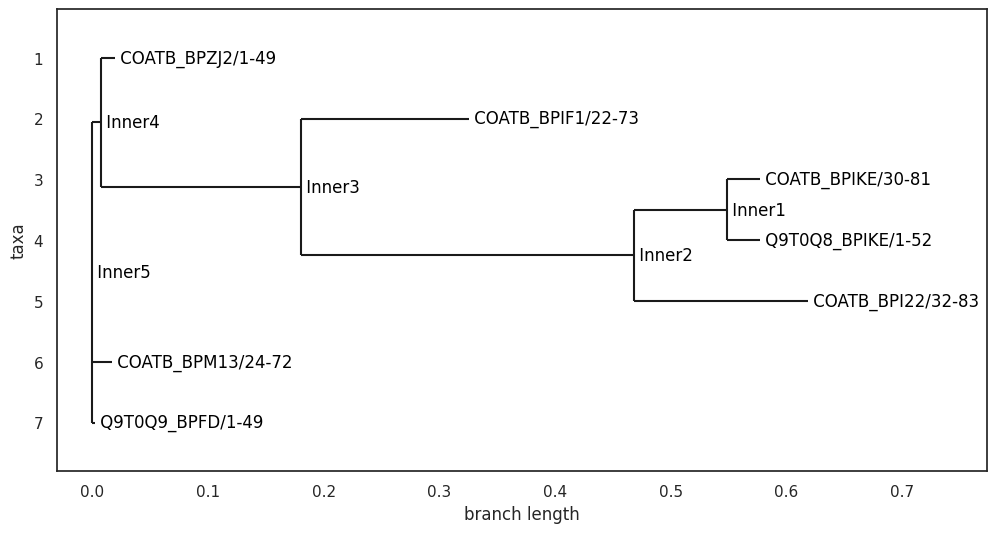

In [71]:
# Plot Tree
fig,axes = plt.subplots(1,1,figsize=(12,6))
treep = Phylogeny.from_tree(tree)
Phylo.draw(treep,axes=axes)

<div style="color:white;display:fill;border-radius:8px;font-size:100%; letter-spacing:1.0px;"><p style="padding: 5px;color:white;text-align:left;"><b><span style='color:#E888BB'>PARSIMONY BASED APPROACH</span></b></p></div>



In [72]:
''' Create a starting tree '''

# sub_alin2 =  "/kaggle/working/sub_alin2.fasta"
sub_alin2 = AlignIO.read("sub_alin2.fasta", "fasta")

calculator = DistanceCalculator('identity') # create calculator
dist_mat = calculator.get_distance(sub_alin2) # get the distance matrix of a given alignment object
constructor = DistanceTreeConstructor(calculator,'nj') # initialise
tree_0 = constructor.build_tree(sub_alin2) # main algorithm

In [73]:
# Recall Alignment
print(alin2,'\n')

Alignment with 7 rows and 52 columns
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIRL...SKA COATB_BPIKE/30-81
AEPNAATNYATEAMDSLKTQAIDLISQTWPVVTTVVVAGLVIKL...SRA Q9T0Q8_BPIKE/1-52
DGTSTATSYATEAMNSLKTQATDLIDQTWPVVTSVAVAGLAIRL...SKA COATB_BPI22/32-83
AEGDDP---AKAAFNSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPM13/24-72
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA COATB_BPZJ2/1-49
AEGDDP---AKAAFDSLQASATEYIGYAWAMVVVIVGATIGIKL...SKA Q9T0Q9_BPFD/1-49
FAADDATSQAKAAFDSLTAQATEMSGYAWALVVLVVGATVGIKL...SRA COATB_BPIF1/22-73 



In [74]:
from Bio.Phylo.TreeConstruction import ParsimonyScorer, NNITreeSearcher,ParsimonyTreeConstructor

scorer = ParsimonyScorer()
searcher = NNITreeSearcher(scorer)
constructor = ParsimonyTreeConstructor(searcher,tree_0)
pars_tree = constructor.build_tree(alin2)
print(pars_tree)

Tree(rooted=True)
    Clade(branch_length=0)
        Clade(branch_length=0.1672676282051282, name='Inner2')
            Clade(branch_length=0.15024038461538464, name='COATB_BPI22/32-83')
            Clade(branch_length=0.08052884615384609, name='Inner1')
                Clade(branch_length=0.028846153846153855, name='Q9T0Q8_BPIKE/1-52')
                Clade(branch_length=0.028846153846153855, name='COATB_BPIKE/30-81')
        Clade(branch_length=0.1203926282051282, name='Inner3')
            Clade(branch_length=0.17307692307692302, name='Inner4')
                Clade(branch_length=0.007211538461538464, name='Inner5')
                    Clade(branch_length=0.002403846153846173, name='Q9T0Q9_BPFD/1-49')
                    Clade(branch_length=0.0168269230769231, name='COATB_BPM13/24-72')
                Clade(branch_length=0.012019230769230754, name='COATB_BPZJ2/1-49')
            Clade(branch_length=0.14503205128205127, name='COATB_BPIF1/22-73')


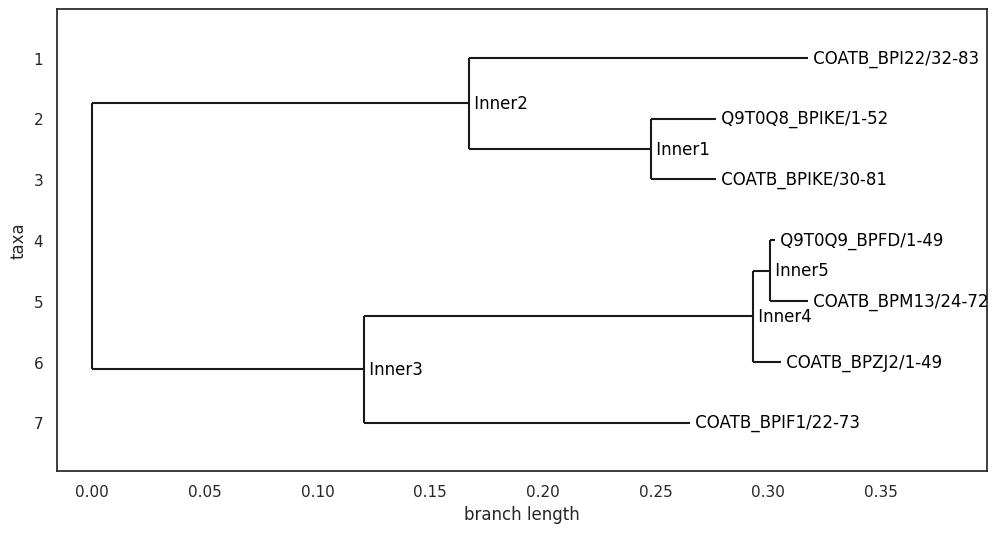

In [75]:
# Plot Tree
fig,axes = plt.subplots(1,1,figsize=(12,6))
treep = Phylogeny.from_tree(pars_tree)
Phylo.draw(treep,axes=axes)

In [76]:
simple = open("example.dnd", "w")
simple.write('(((A,B),(C,D),(E,F,G)));')
simple.close()

tree = Phylo.read('example.dnd','newick')
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
            Clade()
                Clade(name='E')
                Clade(name='F')
                Clade(name='G')


In [77]:
Phylo.draw_ascii(tree)

                                                    ________________________ A
                           ________________________|
                          |                        |________________________ B
                          |
                          |                         ________________________ C
_ ________________________|________________________|
                          |                        |________________________ D
                          |
                          |                         ________________________ E
                          |                        |
                          |________________________|________________________ F
                                                   |
                                                   |________________________ G



In [80]:
Phylo.convert('example.dnd','newick',
              'tree.xml','phyloxml')
trees = Phylo.parse('tree.xml','phyloxml')
for t in trees:
    print(t)

Phylogeny(rooted=False)
    Clade()
        Clade()
            Clade()
                Clade(name='A')
                Clade(name='B')
            Clade()
                Clade(name='C')
                Clade(name='D')
            Clade()
                Clade(name='E')
                Clade(name='F')
                Clade(name='G')


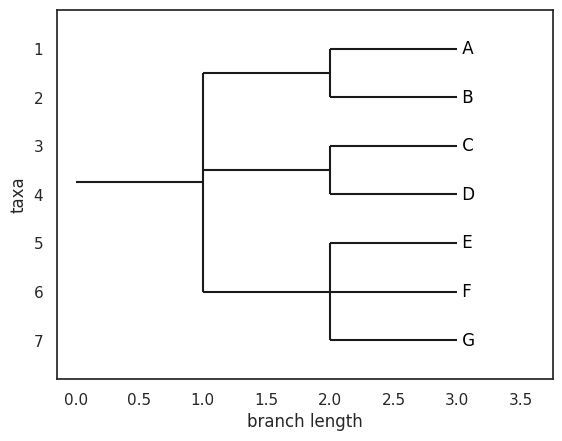

In [81]:
treep = Phylogeny.from_tree(tree)
Phylo.draw(treep)

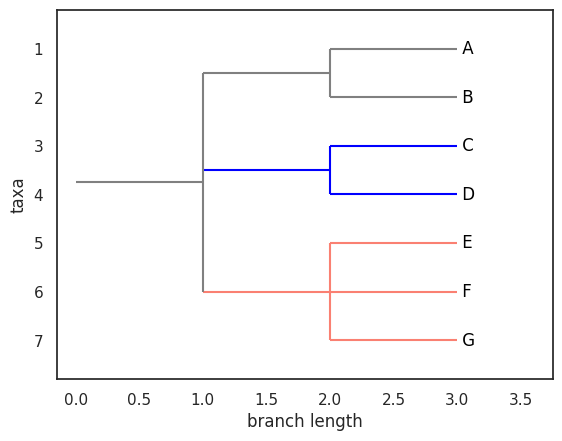

In [82]:
treep.root.color = 'gray'
mrca = treep.common_ancestor({'name':'E'},{'name':'F'})
mrca.color = 'salmon'
treep.clade[0,1].color = 'blue'
Phylo.draw(treep)